# Importing packages, datasets and its overview.

## 1.1 Setup.

Importing all packages and functions. Checking current directory, importing data, creating combined dataframe.

In [1]:
import numpy as np #algebra 
import math

import pandas as pd #manipulation
from pandas import DataFrame, Series 

import seaborn as sns #plotting pakages
import matplotlib.pyplot as plt

import warnings #ignoring irrelevant errors
warnings.filterwarnings('ignore')

from scipy import stats  #for skewness normalization
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.preprocessing import StandardScaler, RobustScaler

from IPython.core.interactiveshell import InteractiveShell #printing all
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline                                        
warnings.filterwarnings('ignore')

train = pd.read_csv('train.csv')
train = train.drop([1459])
test = pd.read_csv('test.csv')

ID = test.Id


## 1.2 Overview of the dataset.

In [2]:
train.shape
test.shape

train.head()
train.tail()
train.columns

(1459, 81)

(1459, 80)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
train = train.drop(["Id"], axis=1)
test = test.drop(["Id"], axis=1)

train.shape
test.shape

(1459, 80)

(1459, 79)

### 1.2.1 Response variable.

Descriptive statistics:

In [4]:
train["SalePrice"].describe()

count      1459.000000
mean     180944.102810
std       79464.918335
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Plotting distributions with seaborn package and matplotlib, also getting its
curtosis and skewness.

Note: variable normally distributed with positive skewness.

6.529881857549899

1.8817600468196507

(array([  5.,   2.,   8.,   7.,  13.,  40.,  32.,  41.,  74.,  79., 109.,
        118., 100.,  87.,  67.,  88.,  81.,  60.,  47.,  41.,  36.,  42.,
         40.,  26.,  19.,  25.,  25.,  17.,  13.,   7.,  11.,  18.,  10.,
         10.,   5.,   3.,   4.,   6.,   8.,   5.,   5.,   2.,   1.,   4.,
          2.,   2.,   1.,   2.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,
          1.,   0.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.]),
 array([ 34900.  ,  43901.25,  52902.5 ,  61903.75,  70905.  ,  79906.25,
         88907.5 ,  97908.75, 106910.  , 115911.25, 124912.5 , 133913.75,
        142915.  , 151916.25, 160917.5 , 169918.75, 178920.  , 187921.25,
        196922.5 , 205923.75, 214925.  , 223926.25, 232927.5 , 241928.75,
        250930.  , 259931.25, 268932.5 , 277933.75, 286935.  , 295936.25,
        304937.5 , 313938.75, 322940.  , 331941.25, 340942.5 , 349943.75,
        35

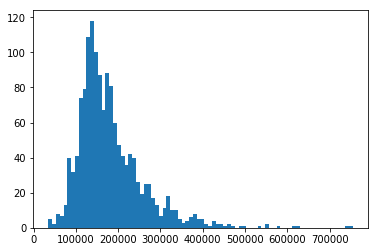

In [5]:
train["SalePrice"].kurt() #mod(kurtosis)> 2, not normal 
train["SalePrice"].skew() #mod(skewness)> 0.5, not normal 

plt.hist(train["SalePrice"], bins=80) 

Note: Looks like SalePrice is not normal. It has to be transformed.

### 1.2.2 Correlations.

Plotting overview of correlations:

(<matplotlib.figure.Figure at 0x190d61d6518>,
 <matplotlib.axes._subplots.AxesSubplot at 0x190d621d6d8>)

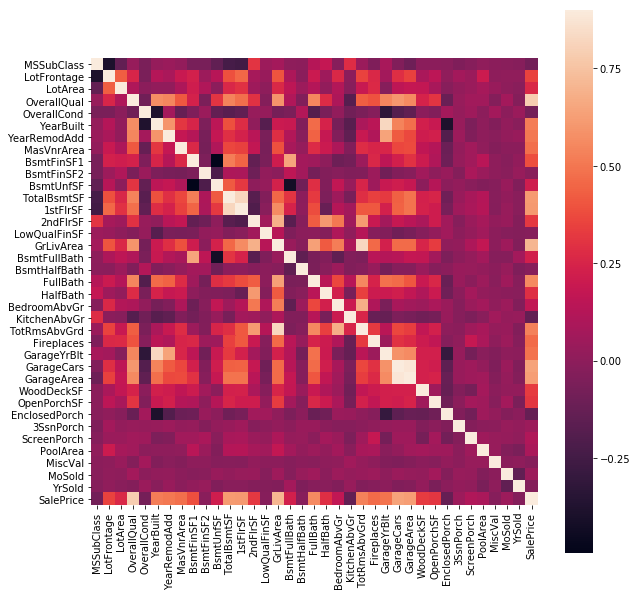

In [6]:
corrmat = train.corr()                      #gives back correlations
plt.subplots(figsize=(10,10))               #sets the size of (heatmap, legend)
sns.heatmap(corrmat, vmax=.90, square=True) #produces heatmap with given corrmat

OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF show relatively big correlations with the response. Besides them also - FullBath, TotRmsAbvGrd, YearBuilt

Getting more detailed correlation of top 10 most correlated variables with response.

Note: GarageCars depends on GarageArea and since first has higher correlation 
we will exclude the latter.

(<matplotlib.figure.Figure at 0x190d6199550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x190d64f4470>)

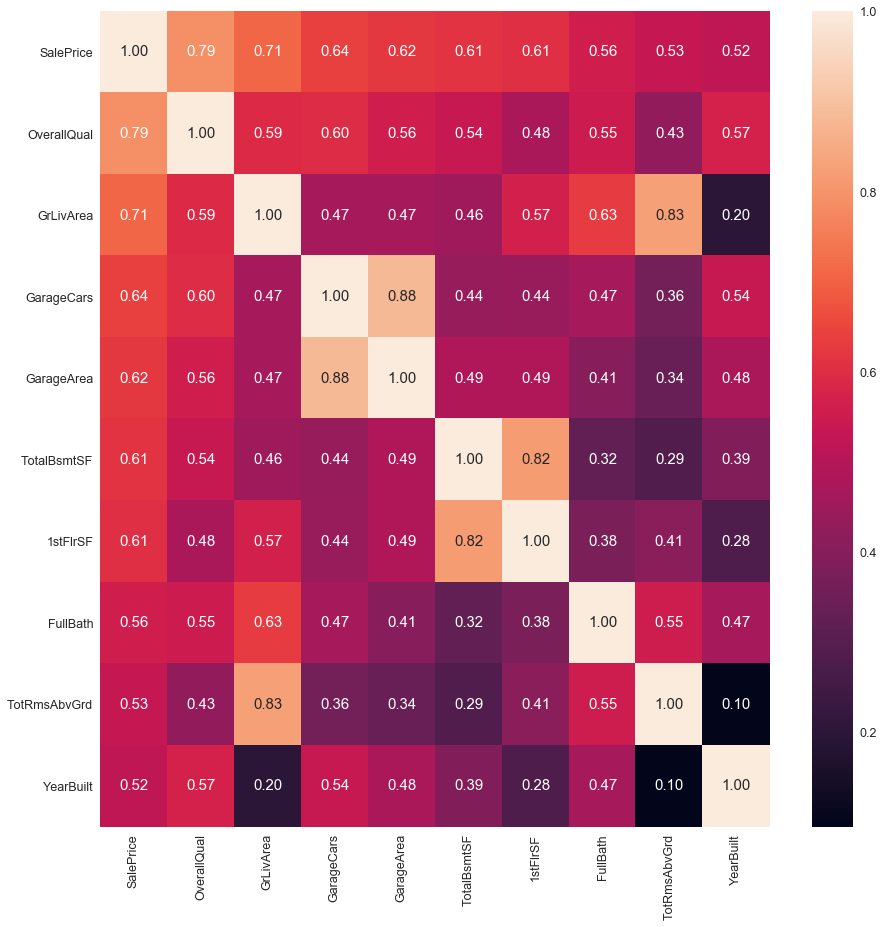

In [7]:
n=10
columns = corrmat.nlargest(n, "SalePrice")["SalePrice"].index  #gives columns of n=10 biggest correlations
cm = np.corrcoef(train[columns].values.T)                      #getting correlations of those 10 variables
sns.set(font_scale=1.25)                                     #setup
plt.subplots(figsize=(15,15)) 
sns.heatmap(cm, cbar=True, annot=True, square=False, fmt =".2f", 
                   annot_kws={"size": 15}, yticklabels = columns.values,
                   xticklabels=columns.values) 
                   #sns.heatmap(data, valuesbar, exactvalues,  )

Further plotting shows correlations between interesting variables.

### 1.2.3 Plots with most correlated variables.

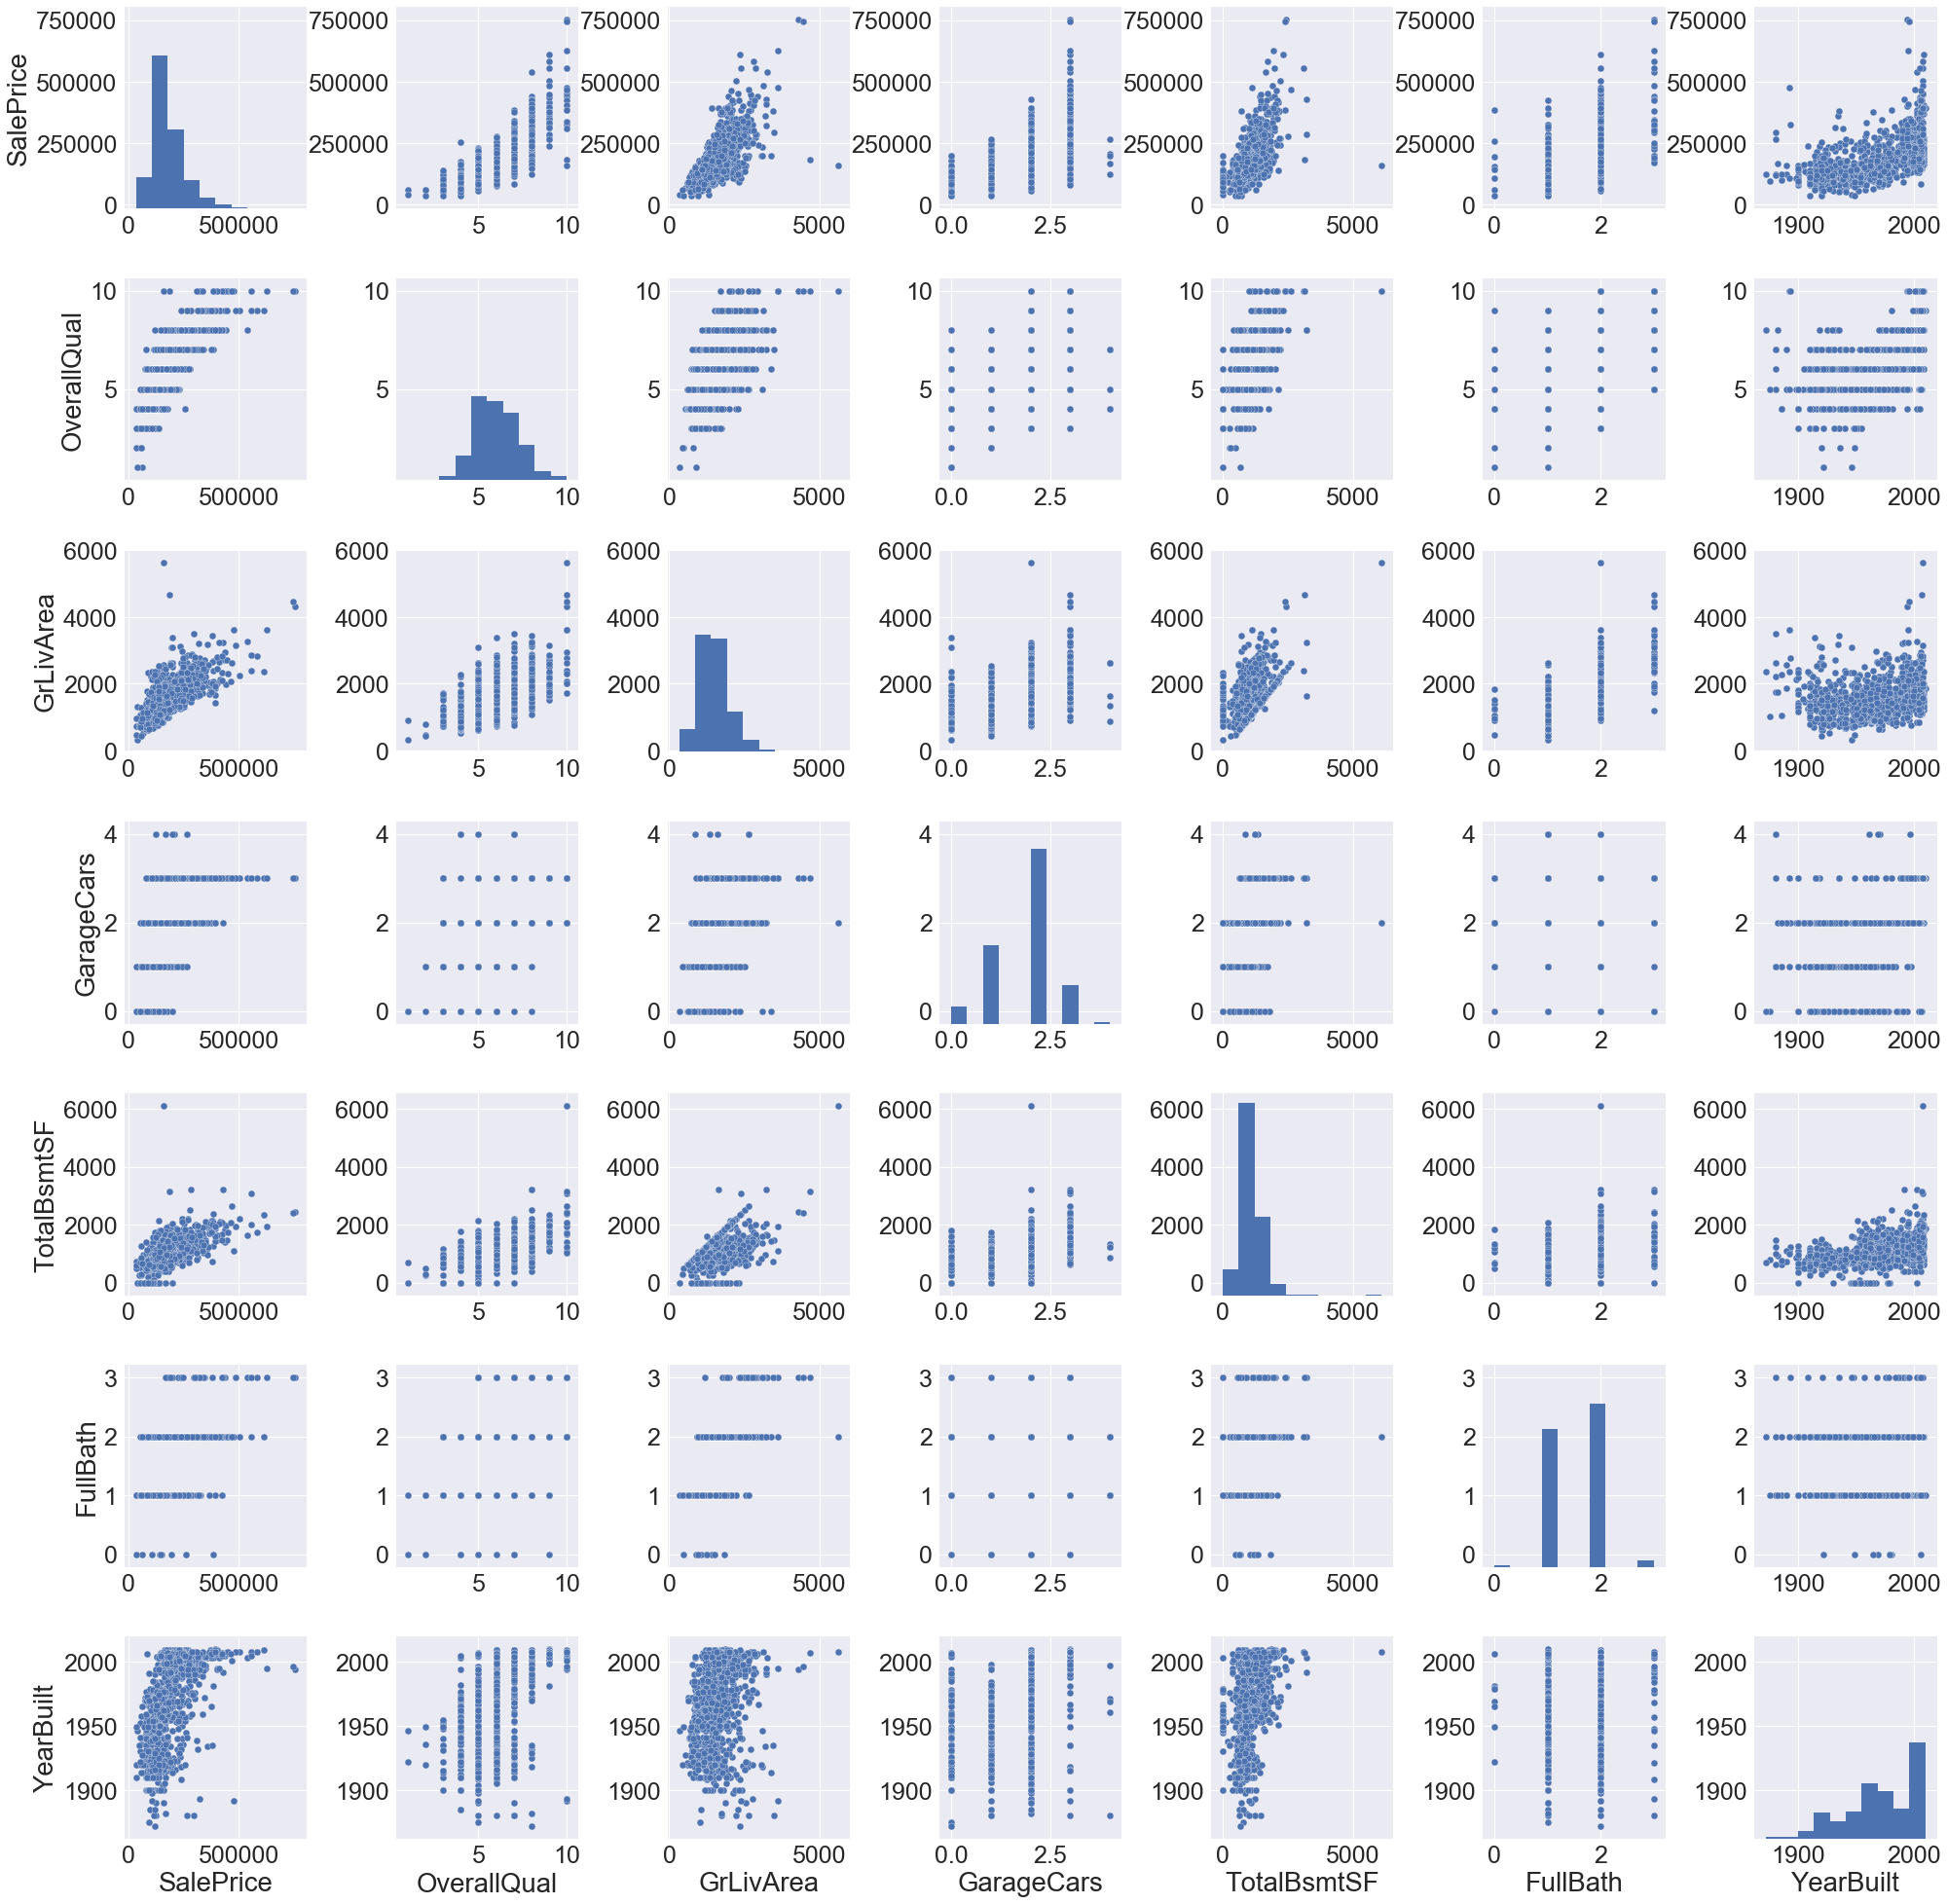

In [8]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.set(font_scale=2.5)
sns.pairplot(train[columns], size = 4)
#this pairplot shows all interactions between our variables 

Let's plot GrLivArea and TotalBsmtSF agains SalePrice, looks like we have potential outliers.

Text(0.5,0,'GrLivArea')

Text(0,0.5,'SalePrice')

[0, 5000, 0, 800000]

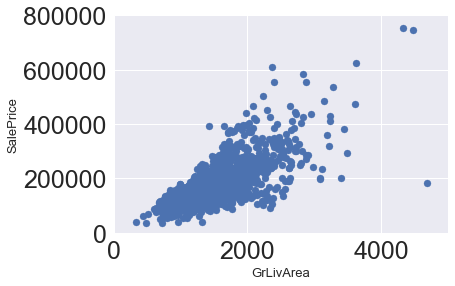

In [9]:
plt.scatter(x="GrLivArea", y="SalePrice", data=train)
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.axis([0, 5000, 0, 800000])

plt.show()

Text(0.5,0,'SalePrice')

Text(0,0.5,'TotalBsmtSF')

[0, 800000, 0, 5000]

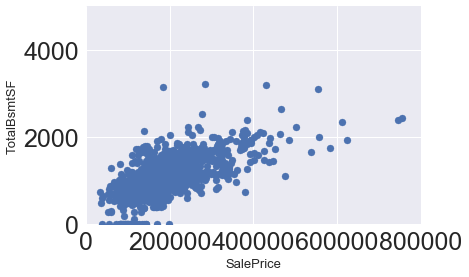

In [10]:
plt.scatter(x="SalePrice", y="TotalBsmtSF", data=train)
plt.xlabel('SalePrice', fontsize=13)
plt.ylabel('TotalBsmtSF', fontsize=13)
plt.axis([0, 800000, 0, 5000], fontsize=5)

plt.show()

# Tidying up the dataset.

In [11]:
train.SalePrice.describe()

count      1459.000000
mean     180944.102810
std       79464.918335
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## 2.1 Removing outliers of most correlated numerical variables.

We saw that graphs of SalePrice and GrLivArea & TotalBsmtSF have outliers (look above), we want to delete those.
I'm duplicating two observations to fill up those two lacking.

In [12]:
train.shape
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['TotalBsmtSF']>2000) & (train['SalePrice']>700000)].index)
train.shape
copy = train[4:8]
train = train.append(copy)
train.shape 

(1459, 80)

(1455, 80)

(1459, 80)

Text(0.5,0,'GrLivArea')

Text(0,0.5,'SalePrice')

[0, 5000, 0, 800000]

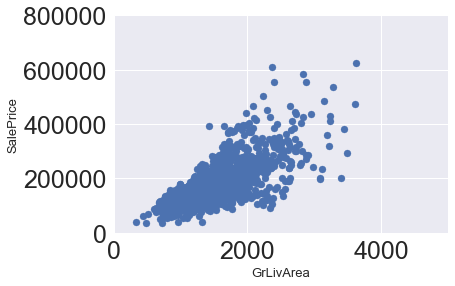

In [13]:
plt.scatter(x="GrLivArea", y="SalePrice", data=train)
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.axis([0, 5000, 0, 800000])

plt.show()

Text(0.5,0,'SalePrice')

Text(0,0.5,'TotalBsmtSF')

[0, 800000, 0, 5000]

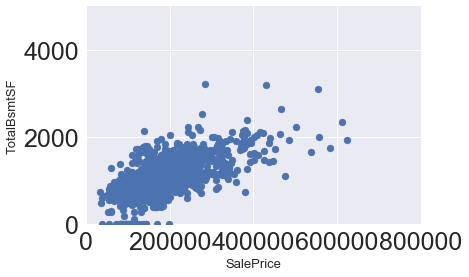

In [14]:
plt.scatter(x="SalePrice", y="TotalBsmtSF", data=train)
plt.xlabel('SalePrice', fontsize=13)
plt.ylabel('TotalBsmtSF', fontsize=13)
plt.axis([0, 800000, 0, 5000], fontsize=5)

plt.show()

## 2.2 Scalling the response.

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([ 34900,  35311,  37900, ..., 582933, 611657, 625000], dtype=int64)),
 (72575.37523120604, 180296.5702535984, 0.9444829452776466))

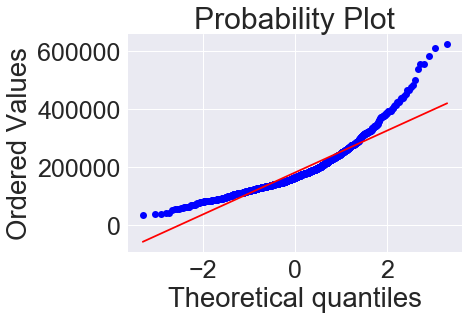

In [15]:
stats.probplot(train['SalePrice'], plot=plt) 

As we've seen previously it's not normally distributed (Normal QQ plot confirms that), this is an important assumption for further modelling, it turns out models work better with symmetric Gaussian distributions, therefore we want to get rid of the skewness by using log transformation. 

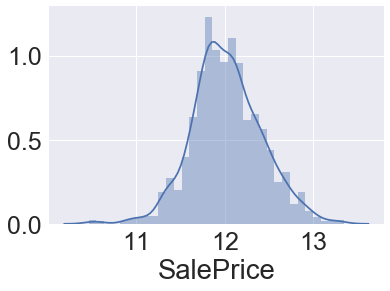

In [16]:
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'])

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.27582925,
         13.32392858, 13.34550853])),
 (0.3952570714875995, 12.022753531587975, 0.9960373500908111))

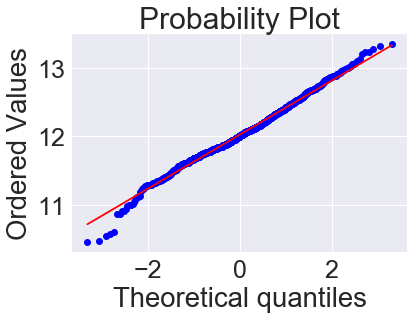

In [17]:
stats.probplot(train['SalePrice'], plot=plt)

Now it's roughly normal, we can create combined data frame.

In [18]:
y_train = train["SalePrice"] #prices after log transformation needed for training

df_combined = pd.concat([train, test]) #combining train/test
df_combined = df_combined.drop(["SalePrice"], axis=1) 

df_combined.head(10)
df_combined.shape

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


(2918, 79)

## 2.3 Converting variable types.

In [19]:
df_combined["MSSubClass"] = df_combined["MSSubClass"].apply(str)
df_combined["YrSold"] = df_combined["YrSold"].apply(str)
df_combined["MoSold"] = df_combined["MoSold"].apply(str)

## 2.3 Missing values.

In [20]:
all = df_combined.isnull().sum().sort_values(ascending=False)
percent = (df_combined.isnull().sum()/2919).sort_values(ascending=False)
missing = pd.concat([all, percent], axis= 1, keys = ["Total", "Percent"])
missing = missing.drop(missing[(missing["Total"]==0)].index)
missing #all missing values

missing.index

,Total,Percent
PoolQC,2910,0.996917
MiscFeature,2811,0.963001
Alley,2720,0.931826
Fence,2347,0.804042
FireplaceQu,1420,0.486468
LotFrontage,487,0.166838
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageCond,159,0.054471


Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtHalfBath', 'Utilities',
       'Functional', 'BsmtFullBath', 'Electrical', 'Exterior2nd',
       'KitchenQual', 'GarageCars', 'Exterior1st', 'GarageArea', 'TotalBsmtSF',
       'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'SaleType'],
      dtype='object')

Analyzing the legend we have:

1) Numerical:
'LotFrontage', 'BsmtFinType2', 'BsmtFinType1', 'BsmtHalfBath', 'BsmtFullBath',  'BsmtUnfSF', 
'BsmtFinSF2', 'BsmtFinSF1', 'MasVnrArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea' 

2) Categorical:    
'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GarageCond', 'GarageType',
'BsmtCond', 'BsmtExposure', 'BsmtQual', 'MasVnrType' 
        
3) Others:
'LotFrontage' (numerical, logic assumes >0, I will replace NaNs by median grouped by Neighbourhood as they should have similar numbers to those lacking)
    
'MSZoning', 'Utilities','Functional',  'Electrical', 'Exterior2nd',
'KitchenQual',  'Exterior1st', 'SaleType' (categorial, legend assumes no "None")

What we also need to do is find features that were put by mistake in garage and basement and turn
them into 0/None.

In [21]:
garage = df_combined[(df_combined.GarageQual.isnull()==True)&(df_combined.GarageYrBlt.isnull()==True)&
                     (df_combined.GarageFinish.isnull()==True)&(df_combined.GarageCond.isnull()==True)&
                     (df_combined.GarageType.isnull()==False)]
garage.index
garage["GarageType"][666] = "None"
garage["GarageType"][1116] = "None"

#now those two accidential values are replaced with None, nextly remaining 8 NaNs will be replaced
#with None by a function and it's all fine 

Int64Index([666, 1116], dtype='int64')

In [22]:
basement = df_combined[(df_combined.BsmtCond.isnull()==True)&
                       (df_combined.BsmtFinType1.isnull()==False)]
#basement.index, replace missing value with the most popular one
df_combined["BsmtCond"][580, 725, 1064] = df_combined["BsmtCond"].mode()[0]

basement2 = df_combined[(df_combined.BsmtExposure.isnull()==True)&
                       (df_combined.BsmtFinType1.isnull()==False)]
#basement2.index 
df_combined["BsmtExposure"][948, 27, 888] = df_combined["BsmtExposure"].mode()[0]


basement3 = df_combined[(df_combined.BsmtQual.isnull()==True)&
                       (df_combined.BsmtFinType1.isnull()==False)]
#basement3.index
df_combined["BsmtQual"][757, 758] = df_combined["BsmtQual"].mode()[0]


basement4 = df_combined[(df_combined.BsmtFinType2.isnull()==True)&
                       (df_combined.BsmtFinType1.isnull()==False)]
#basement4.index 
df_combined["BsmtFinType2"][332] = df_combined["BsmtFinType2"].mode()[0]

#garage was not consistent so all in all I've changed 9 values to the dominant one (9 examples where
#just)

In [23]:
df_combined["LotFrontage"] = df_combined.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [24]:
#for all others

numerical = ['BsmtFinType2', 'BsmtFinType1', 'BsmtHalfBath', 'BsmtFullBath',  'BsmtUnfSF', 
'BsmtFinSF2', 'BsmtFinSF1', 'MasVnrArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea' ]

categorical = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GarageCond', 'GarageType',
'BsmtCond', 'BsmtExposure', 'BsmtQual', 'MasVnrType']

others = ['MSZoning', 'Utilities','Functional',  'Electrical', 'Exterior2nd',
'KitchenQual',  'Exterior1st', 'SaleType']

for var in numerical:
    df_combined[var] = df_combined[var].fillna(0)

for var in categorical:
    df_combined[var] = df_combined[var].fillna("None")
    
for var in others:
    df_combined[var] = df_combined[var].fillna(df_combined[var].mode()[0])
    
df_combined.isnull().values.any()
#all missing values are removed

False

All missing values have been replaced by appropiate ones.

## 2.4 Normalizing (i.e reducing skewness).

In [25]:
numerical_f = df_combined.select_dtypes(exclude = ["object"]).columns
categorical_f = df_combined.select_dtypes(include = ["object"]).columns

feat_num = df_combined[numerical_f]
feat_cat = df_combined[categorical_f]

In [26]:
skewness = feat_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          21.924401
PoolArea         18.711532
LotArea          13.125839
LowQualFinSF     12.086650
3SsnPorch        11.125994
KitchenAbvGr      4.301402
BsmtFinSF2        4.150193
EnclosedPorch     3.989983
ScreenPorch       3.945898
BsmtHalfBath      3.945295
MasVnrArea        2.596650
OpenPorchSF       2.524958
WoodDeckSF        1.828714
1stFlrSF          1.252463
LotFrontage       1.091054
GrLivArea         0.974918
BsmtFinSF1        0.971993
BsmtUnfSF         0.921297
2ndFlrSF          0.840358
TotRmsAbvGrd      0.748051
Fireplaces        0.724454
HalfBath          0.697210
TotalBsmtSF       0.662407
BsmtFullBath      0.619969
OverallCond       0.570641
BedroomAbvGr      0.324794
GarageArea        0.216088
OverallQual       0.179968
FullBath          0.157921
GarageCars       -0.221112
YearRemodAdd     -0.451029
YearBuilt        -0.599855
dtype: float64

We can try to reduce skewness so that variables have aproximately normal distribution (skewness > 0.75), and we can derive meaningful results from them.

(BoxCox transformation)

In [27]:
skewness = skewness[abs(skewness) > 0.75] #we don't mind skewness <0.75

print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
print("Mean skewnees: {}".format(np.mean(skewness))) #formats just puts values in brackets

skewed_features = skewness.index #get var names of skewed features 
lam = 0.15 

for feat in skewed_features:
    feat_num[feat] = boxcox1p(feat_num[feat], boxcox_normmax(feat_num[feat] + 1))
    #transfering numeric features (can't transfer categorical)
    df_combined[feat] = boxcox1p(df_combined[feat], boxcox_normmax(df_combined[feat] + 1))
    
skewness.sort_values(ascending=False)

There are 19 skewed numerical features to Box Cox transform
Mean skewnees: 5.805767987585955


MiscVal          21.924401
PoolArea         18.711532
LotArea          13.125839
LowQualFinSF     12.086650
3SsnPorch        11.125994
KitchenAbvGr      4.301402
BsmtFinSF2        4.150193
EnclosedPorch     3.989983
ScreenPorch       3.945898
BsmtHalfBath      3.945295
MasVnrArea        2.596650
OpenPorchSF       2.524958
WoodDeckSF        1.828714
1stFlrSF          1.252463
LotFrontage       1.091054
GrLivArea         0.974918
BsmtFinSF1        0.971993
BsmtUnfSF         0.921297
2ndFlrSF          0.840358
dtype: float64

Getting numerical variables (for skewness).

In [28]:
skewness = feat_num.apply(lambda x: skew(x)) #had to define skewness second time
skewness = skewness[abs(skewness) > 0.5]     #to see the change!

print("There are {} skewed numerical features after Box Cox transform".format(skewness.shape[0]))
print("Mean skewnees: {}".format(np.mean(skewness)))

skewness.sort_values(ascending=False)

There are 20 skewed numerical features after Box Cox transform
Mean skewnees: 3.043312209498633


PoolArea         16.298470
3SsnPorch         8.743198
LowQualFinSF      8.494109
MiscVal           5.185777
BsmtHalfBath      3.793171
KitchenAbvGr      3.779116
ScreenPorch       3.153271
BsmtFinSF2        2.578064
EnclosedPorch     2.146101
MasVnrArea        0.975733
2ndFlrSF          0.891181
WoodDeckSF        0.784452
TotRmsAbvGrd      0.748051
Fireplaces        0.724454
HalfBath          0.697210
TotalBsmtSF       0.662407
OpenPorchSF       0.620723
BsmtFullBath      0.619969
OverallCond       0.570641
YearBuilt        -0.599855
dtype: float64

As we see, some variables remained skewed but average skewness has decreased. Let's get rid of those skewed ones after feature engineering.  

# 3 Dataset manipulations.

## 3.1 Feature engineering.

In [29]:
print('Before selection, data has: {} variables'.format(df_combined.shape[1]))
df_combined.shape

Before selection, data has: 79 variables


(2918, 79)

First approach is to delete features with high percentage of missing values, but in the same time making new binary variable.

In [30]:
df_combined["Pool"] = df_combined["PoolArea"].apply(lambda x: 1 if x >0 else 0)

#df_combined.drop(['PoolArea', 'PoolQC'], axis=1, inplace=True)

In [31]:
df_combined["MiscFeature"].unique().sum()
df_combined[df_combined["MiscFeature"]!="None"]["MiscFeature"]
#MiscFeature describes nice and desired features such as TennisCourt, 2nd Garage, but most of them 
#just sheds
df_combined["Additional"] = df_combined["MiscVal"].apply(lambda x: 1 if x >0 else 0)

df_combined.drop(["MiscFeature", "MiscVal"], axis=1, inplace=True)

'NoneShedGar2OthrTenC'

5       Shed
7       Shed
16      Shed
17      Shed
51      Shed
84      Shed
95      Shed
98      Shed
99      Shed
106     Shed
214     Shed
249     Shed
250     Shed
335     Shed
338     Shed
346     Gar2
392     Shed
439     Shed
499     Shed
502     Shed
510     Shed
539     Shed
589     Shed
611     Shed
626     Shed
634     Shed
705     Othr
725     Shed
733     Shed
760     Shed
        ... 
560     Shed
584     Shed
605     Shed
612     Shed
613     Othr
653     Shed
666     Shed
679     Shed
709     Shed
734     Gar2
740     Shed
785     Shed
856     Shed
924     Shed
939     Shed
961     Shed
971     Shed
1026    Shed
1082    Shed
1097    Shed
1237    Othr
1261    Shed
1266    Shed
1289    Shed
1292    Shed
1330    Gar2
1343    Shed
1348    Shed
1398    Shed
1457    Shed
Name: MiscFeature, Length: 107, dtype: object

In [32]:
df_combined["Alley"]=df_combined["Alley"].replace({"None": 0})
df_combined["Alley"]= df_combined["Alley"].replace(["Grvl", 'Pave'], 1)

In [33]:
df_combined["Fireplace"] = df_combined["Fireplaces"].apply(lambda x: 1 if x >0 else 0)
df_combined.drop(["Fireplaces", "FireplaceQu"], axis=1, inplace=True)

In [34]:
df_combined["Fence"].unique()
df_combined["Fence"]=df_combined["Fence"].replace({"None": 0})
df_combined["Fence"]= df_combined["Fence"].replace(['MnPrv', 'GdWo', 'GdPrv', 'MnWw'], 1)

array(['None', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

Done!
In the dataset there are also a big number of variables that have little or no effect on the pize. Examples: 

The fact that garage is a bit bigger doesn't really matter, what matters is that garage is present. In this case Area and Cars are correlated so remove just one to avoid multicolinearity

In [35]:
df_combined["Garage"] = df_combined['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

#df_combined.drop(["GarageArea", "GarageType", "GarageYrBlt", "GarageQual"], axis=1, inplace=True)

In [36]:
df_combined['Basement'] = df_combined['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

#df_combined.drop(["BsmtFinType1","BsmtFinSF2","BsmtFinSF1", "BsmtUnfSF","BsmtFinType2", "BsmtCond", "BsmtExposure", "BsmtQual"], axis=1, inplace=True)

In [37]:
df_combined['TotalSF'] = (df_combined['TotalBsmtSF'] + 
                          0.5*df_combined['LowQualFinSF'] +
                                 df_combined['1stFlrSF'] + 
                          df_combined['2ndFlrSF'])

#df_combined.drop(["TotalBsmtSF", "LowQualFinSF", "1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)

In [38]:
df_combined["Bath"] = df_combined['BsmtFullBath']+(0.5*df_combined['BsmtHalfBath'])+ df_combined['FullBath'] + (0.5 * df_combined['HalfBath']) 

#df_combined.drop(["BsmtFullBath","BsmtHalfBath", "FullBath", "HalfBath"], axis=1, inplace=True)

In [39]:
df_combined["TotalPorch"]=(df_combined['OpenPorchSF'] + 
                           df_combined['3SsnPorch'] +
                              df_combined['EnclosedPorch'] + 
                           df_combined['ScreenPorch'] +
                              df_combined['WoodDeckSF'])

#df_combined.drop(["3SsnPorch", "EnclosedPorch", "ScreenPorch"], axis=1, inplace=True)

Last approach is to create new variables that are predictable. Example:

OverallQual and OverallCond can be combined into one variable that generally states how well kept is the house (these are correlated).

In [40]:
df_combined["OverallScore"] = (df_combined["OverallQual"])*(df_combined["OverallCond"])


In [41]:
pd.to_numeric(df_combined["GarageQual"], errors='ignore')
pd.to_numeric(df_combined["GarageCond"], errors='ignore')

df_combined["GarageQual"] = df_combined["GarageQual"].replace(["Ex", "Gd", "TA", "Fa", "Po", "None"], [5, 4, 3, 2, 1, 0])
df_combined["GarageCond"] = df_combined["GarageCond"].replace(["Ex", "Gd", "TA", "Fa", "Po", "None"], [5, 4, 3, 2, 1, 0])

df_combined["GarageScore"] = (df_combined["GarageCond"])*(df_combined["GarageQual"])

0         TA
1         TA
2         TA
3         TA
4         TA
5         TA
6         TA
7         TA
8         Fa
9         Gd
10        TA
11        TA
12        TA
13        TA
14        TA
15        TA
16        TA
17        TA
18        TA
19        TA
20        TA
21        TA
22        TA
23        TA
24        TA
25        TA
26        TA
27        TA
28        TA
29        Fa
        ... 
1429      TA
1430      TA
1431    None
1432    None
1433    None
1434      TA
1435      TA
1436      TA
1437      TA
1438      TA
1439      TA
1440      TA
1441      TA
1442      TA
1443      TA
1444      Fa
1445      TA
1446      TA
1447      TA
1448      TA
1449    None
1450      TA
1451      TA
1452      TA
1453    None
1454    None
1455      TA
1456      TA
1457    None
1458      TA
Name: GarageQual, Length: 2918, dtype: object

0         TA
1         TA
2         TA
3         TA
4         TA
5         TA
6         TA
7         TA
8         TA
9         TA
10        TA
11        TA
12        TA
13        TA
14        TA
15        TA
16        TA
17        TA
18        TA
19        TA
20        TA
21        TA
22        TA
23        TA
24        TA
25        TA
26        TA
27        TA
28        TA
29        TA
        ... 
1429      TA
1430      TA
1431    None
1432    None
1433    None
1434      TA
1435      TA
1436      TA
1437      TA
1438      TA
1439      TA
1440      TA
1441      TA
1442      TA
1443      TA
1444      TA
1445      TA
1446      TA
1447      TA
1448      TA
1449    None
1450      Fa
1451      TA
1452      TA
1453    None
1454    None
1455      TA
1456      TA
1457    None
1458      TA
Name: GarageCond, Length: 2918, dtype: object

In [42]:
df_combined["GarageSize"] = (df_combined["GarageCars"])*(df_combined["GarageArea"])

In [43]:
df_combined["QualityGrLivArea"] = (df_combined["GrLivArea"])*(df_combined["OverallQual"])

At the end we should get rid of those variables that only overcomplicate the
model. 

In [44]:
df_combined.columns
print('After selection, data has: {} variables'.format(df_combined.shape[1]))

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'Foundation', 'FullBath', 'Functional',
       'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating',
       'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 

After selection, data has: 87 variables



## 3.2 Removing unscallable variables.

In [45]:
df_combined = df_combined.drop(['MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1', "2ndFlrSF"], axis=1)

Missing values, unscallabe variables are all set, ready to model.  

# 4. Modelling.

In [46]:
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import Lasso 
import xgboost as xgb
from sklearn.linear_model import Ridge

## 4.1 Preparing the dataset.

 We give dataset with x observations and without a response variable and then an array with x numbers that are known response for this dataset, that's how the model is learning. Then we can put in this model dataset without response and response will be generated (predicted).

In [47]:
df_ready = pd.get_dummies(df_combined) #getting dummies 0/1 for categorical

ntrain = test.shape[0]

X_train = df_ready[:ntrain]
X_test = df_ready[ntrain:] #we separated test data that we have to predict

X_train.shape
X_test.shape 
y_train.shape 

(1459, 412)

(1459, 412)

(1459,)

## 4.2 Cross validation.

KFold splits all-known train data to pieces (n_splits pieces) and shuffle them so that 
after model is done we can test how well it does

In [48]:
def rmsle_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

## 4.3 Robust standard errors scalling.

In [49]:
sc=RobustScaler() #robustscalling is similar to normalization but works better with outliers

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## 4.4 Training the model.

### 4.4.1 Lasso regression.

By giving actual values for the dataset we train the model. Then we will give the model data to be predicted (test), what will be compared by Kaggle with actual data that we have no access to.

In [50]:
lasso = Lasso(alpha = 0.001, random_state=1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
score_lasso = rmsle_cv(lasso)
print(score_lasso)
score_lasso.mean()

[0.10220321 0.11145619 0.11860628 0.10207423 0.10755782]


0.10837954869397352

### 4.4.2 XGBoost 

In [52]:
xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1.7817, missing=None,
       n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
       random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
       scale_pos_weight=1, seed=None, silent=1, subsample=0.5213,
       verbosity=1)

score_xgboost = rmsle_cv(xgb)
print(score_xgboost)
score_xgboost.mean()

## 4.4.3 Ridge regression.

In [53]:
ridge = Ridge(alpha = 1, solver = "lsqr", fit_intercept=False)
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [54]:
score_ridge = rmsle_cv(ridge)
print(score_ridge)
score_ridge.mean()

[0.15795584 0.1776244  0.20579318 0.19057429 0.19949944]


0.18628942978327612

## 4.5 Wrapping up results.

In [55]:
prediction_lasso = lasso.predict(X_test)
prediction_lasso = np.exp(prediction_lasso)

prediciton_xgb = xgb.predict(X_test)
prediction_xgb = np.exp(prediciton_xgb)

prediction_ridge = ridge.predict(X_test)
prediction_ridge = np.exp(prediction_ridge)

final_prediction = (prediction_lasso+prediction_xgb)/2

output=pd.DataFrame({'Id':ID, 'SalePrice':final_prediction})
output.to_csv('lassoxgb.csv', index=False)

To develop: make more models, remove outliers, more feature engineering, don't remove too many variables.

Nootebook:

09/09/19 - I finished tidying it all up and made a bit more feature engineering. It didn't give significantly better results judging by cross validation. I started playing with excluding/including variables. After feature engineering and including irrelevant and skewed variables we have means:

0.10882635316126085 for Lasso which solo gave me: 0.11846 in leaderscore (an improvement!)

0.11448087004541277 for XGB which solo gave me: 0.12531 in leaderscore (lame!)

 The model is improved but computational time (for XGB) is about 2 minutes. 
 
 Combined gave me: 0.11898. 
 
 Lasso is still the best.
 
Then I tried to exclude those that were skewed. Then:

0.1088146231872044 for Lasso, improvement of 0.000012 :)
0.11343390923296423 for XGB, improvement of 0.001 :)) 

 I included Ridge model and trying and failing I set the penalty to 1, still veery bad.
 
 11/09/19 - I excluded some of the variables I thought were not predictable. I tried TotalSF features, but It got worse, then I tried Porch features and It got just a little bit worse. Removing Pool features got me very close to the best result (0.108817...), but still including all features turned out to be the best. I then removed Misc feature and improved!

0.10878698206567106 new for Lasso :> 

 Nextly I created GarageScore and with OverallScore I changed them both for multiplication not addition and new result is:
 
0.10852281491459866 for Lasso :>

 Another 'GarageSize' added : 

0.10838008163908426 for Lasso 

"OverallGrLivArea" gives slight improvement:

0.10837954869397352 for Lasso

Let's wrap it up, wait for other models to compute and check what's the actual score on leaderboard. XGB got a bit worse, I'll submit only Lasso.
It got worse (0.11947)!

I'll combine Lasso with Ridge (gave worse of 0.12755). Now combining XGB+Lasso gives 0.0.11986 on leaderboard so shit, still no improvement.

Kernels that helped me writing this notebook were:

https://www.kaggle.com/apapiu/regularized-linear-models
https://www.kaggle.com/dansbecker/submitting-from-a-kernelhttps://www.kaggle.com/dansbecker/submitting-from-a-kernel
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python